In [47]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from pandas.plotting import lag_plot, autocorrelation_plot
%run ../src/models/section_series.py
%matplotlib inline

In [2]:
series_loader = SectionSeriesLoader(
    img_shape=(200, 200),
    SRC_PATH='../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/*.npz')

In [45]:
def plot_series(series):
    max_abs = max(abs(series.max()), abs(series.min()))
    fig, ax = plt.subplots(5,4,figsize=(20,20))
    for i, axi in enumerate(ax.flat):
        axi.imshow(series[i], vmin=-max_abs, vmax=max_abs, cmap='RdBu')
        axi.set(xticks=[], yticks=[])

    plt.show()

## Haiti Series

In [24]:
%%time
haiti_series = series_loader.load({'lat':18.53,'lng':-72.34})

Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F101993.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F121994.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F121995.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F121996.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F141997.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F141998.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F141999.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F142000.v4b_web.stable_lights.avg_vis.tif.npz
Loading 

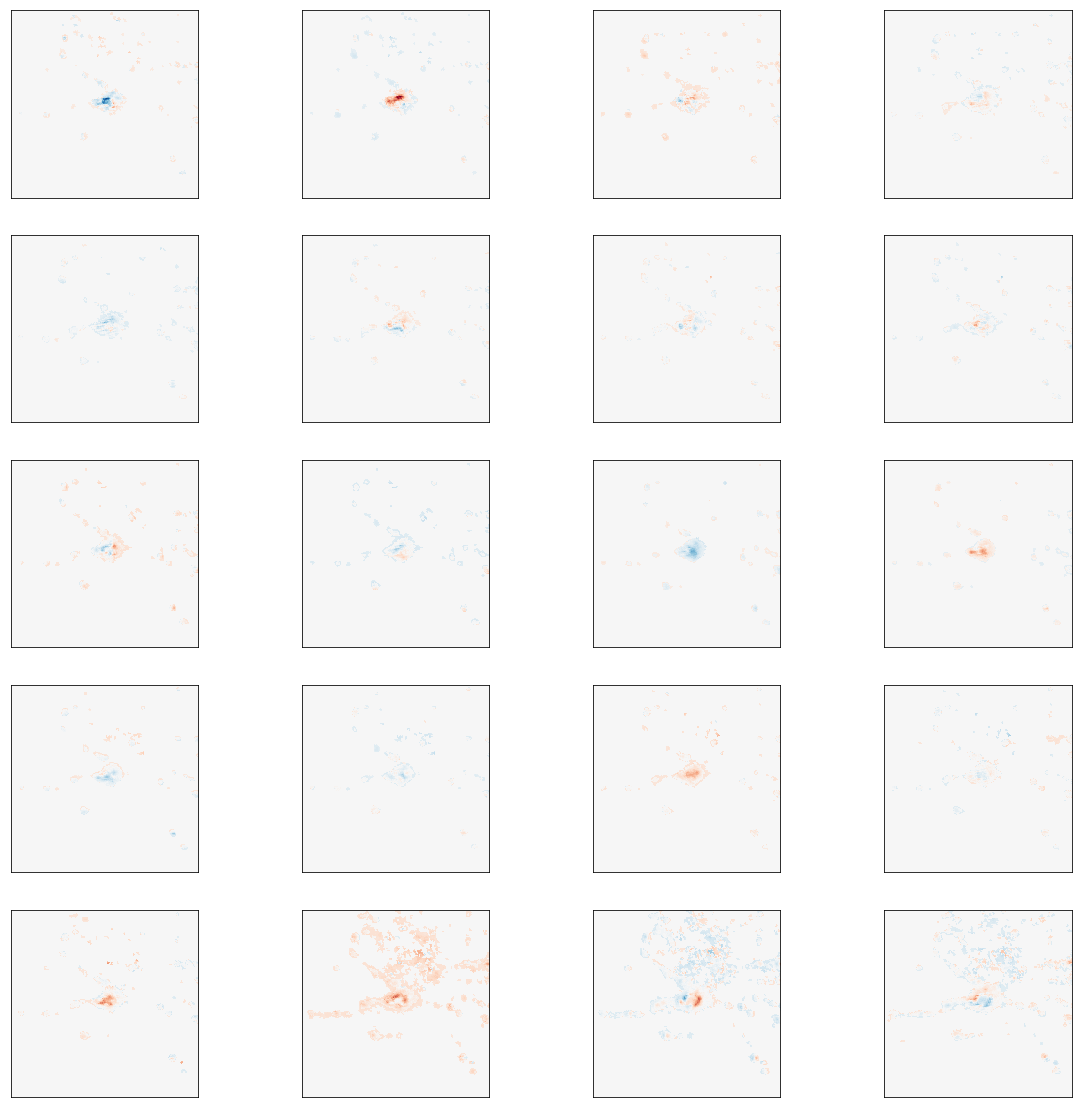

In [29]:
plot_series(haiti_series)

In [30]:
haiti_series_means = haiti_series.mean(axis=(1,2))
haiti_series_means

array([  3.05000000e-03,  -4.42500000e-03,  -1.33050000e-01,
        -2.05000000e-03,   9.91500000e-02,  -1.45000000e-02,
        -1.47250000e-02,   1.70000000e-02,  -1.00700000e-01,
         9.75250000e-02,   7.52000000e-02,  -6.26500000e-02,
         3.50000000e-04,   5.96750000e-02,  -1.30250000e-01,
        -1.50000000e-04,  -7.87500000e-02,  -6.90850000e-01,
         1.82125000e-01,   8.46250000e-02,   3.50750000e-02])

In [31]:
df_haiti_series = pd.DataFrame({
    'mean_change': haiti_series_means
}, index=range(1993,2014))
df_haiti_series.head()

,mean_change
1993,0.003050
1994,-0.004425
1995,-0.133050
1996,-0.002050
1997,0.099150


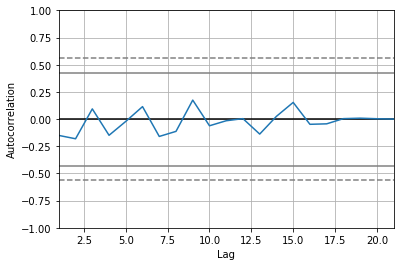

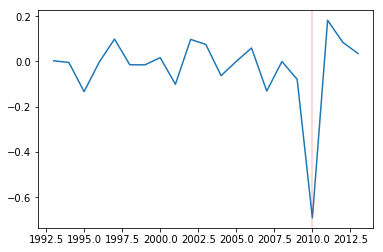

In [32]:
autocorrelation_plot(df_haiti_series['mean_change'])
plt.show()
plt.plot(df_haiti_series['mean_change'])
plt.axvline(x=2010, c='r', lw=.3)
plt.show()
None

## Multiple Series

In [56]:
earthquakes = pd.read_csv('../data/raw/USGSEarthquakeHazards/USGSEarthquakeHazards.csv', index_col=0)
earthquakes_sorted = earthquakes[['time', 'place', 'mag']].sort_values('mag', ascending=False)

In [5]:
%run ../src/models/section_series.py
target_coords_list = [{'lat': r[0],'lng': r[1]} for r
    in earthquakes.sort_values('mag', ascending=False)[['latitude', 'longitude']].values[:15]]
series_loader = SectionSeriesLoader(
    SRC_PATH='../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/*.npz')
series = series_loader.load_multiple(target_coords_list)

Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F101993.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F121994.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F121995.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F121996.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F141997.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F141998.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F141999.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F142000.v4b_web.stable_lights.avg_vis.tif.npz
Loading 

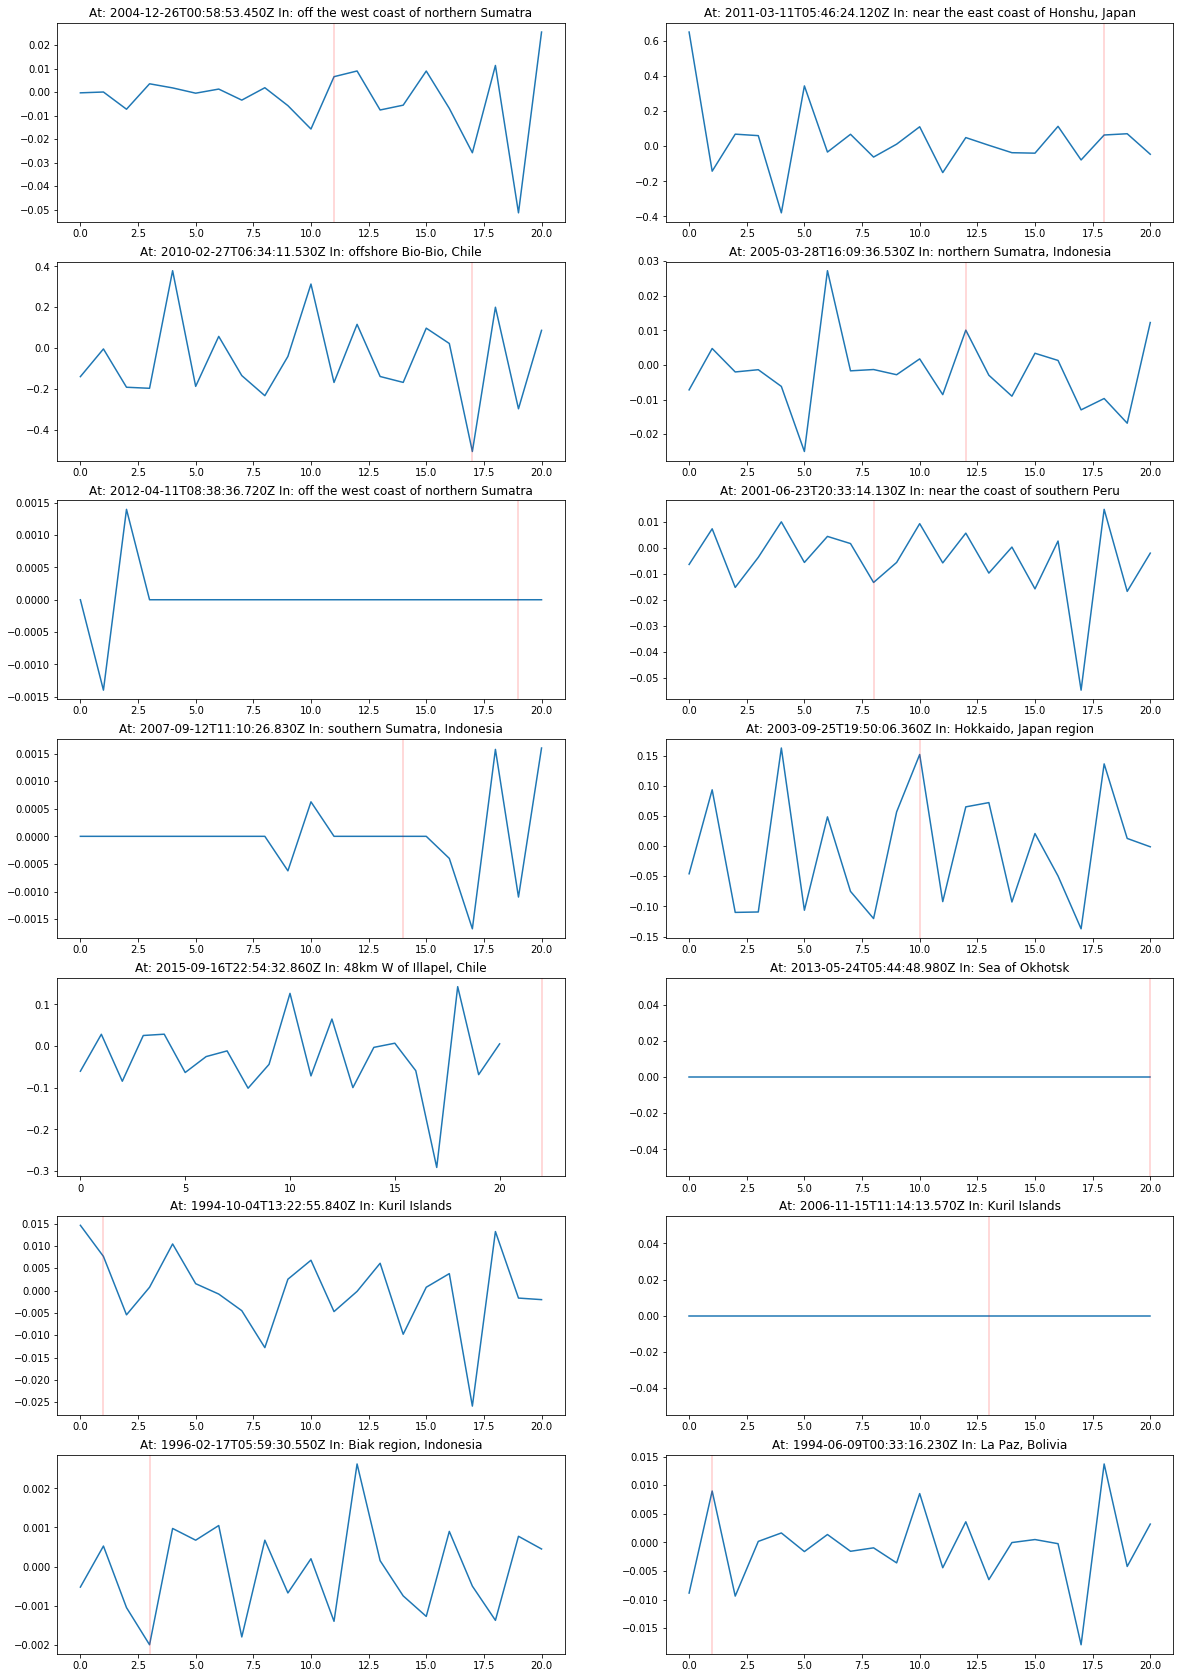

In [41]:
times_and_places = earthquakes.sort_values('mag', ascending=False)[['time','place']].values[:15]
fig, ax = plt.subplots(7,2,figsize=(20,30))
for i, axi in enumerate(ax.flat):
    axi.plot(series[i].mean(axis=(1,2)))
    axi.set_title('At: {} In: {}'.format(*times_and_places[i]))
    axi.axvline(x=int(times_and_places[i][0][:4])-1993, lw=.3, c='r')
    
plt.show()

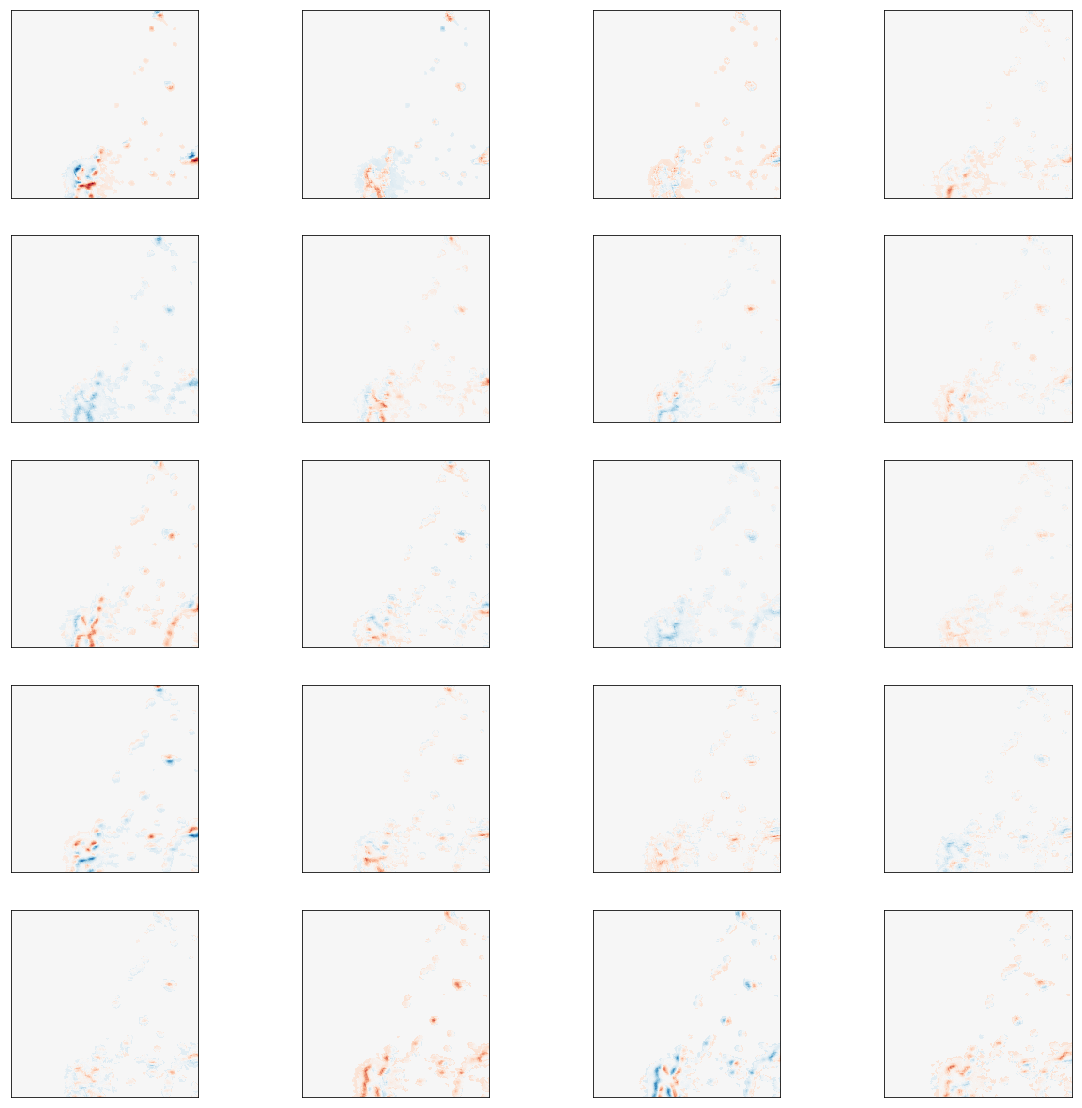

In [46]:
plot_series(series[2])

In [117]:
lags = 3
panel_data = []
for i, s in enumerate(series):
    dummy = np.zeros(len(series[1]))
    dummy[int(earthquakes_sorted['time'][i][:4])-1993] = earthquakes_sorted['mag'][i]
    dataset = pd.DataFrame({
        'earthquake_dummy': dummy,
        'i': i,
        'year': list(range(1993,2014))
    })
    mean_luminosity_return = pd.Series(series[i].mean(axis=(1,2)))
    dataset['mean_luminosity_return_lag_0'] = mean_luminosity_return
    for t in range(1,lags+1):
        dataset['mean_luminosity_return_lag_{}'.format(t)] = mean_luminosity_return\
            .shift(t).fillna(dataset['mean_luminosity_return_lag_{}'.format(t-1)].mean())  # >゜)))><
    panel_data.append(dataset)
    
panel_df = pd.concat(panel_data).set_index(['i','year'])
panel = panel_df.to_panel()

/usr/lib/python3.4/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



In [106]:
panel = pd.Panel(data=datasets)

In [109]:
datasets['0']

,earthquake_dummy,mean_luminosity_return_lag_0,mean_luminosity_return_lag_1,mean_luminosity_return_lag_2,mean_luminosity_return_lag_3
0,0.0,-0.000325,-0.002886,-0.004240,-0.002059
1,0.0,0.000025,-0.000325,-0.004240,-0.002059
2,0.0,-0.007300,0.000025,-0.000325,-0.002059
3,0.0,0.003525,-0.007300,0.000025,-0.000325
4,0.0,0.001775,0.003525,-0.007300,0.000025
5,0.0,-0.000475,0.001775,0.003525,-0.007300
6,0.0,0.001275,-0.000475,0.001775,0.003525
7,0.0,-0.003425,0.001275,-0.000475,0.001775
8,0.0,0.001850,-0.003425,0.001275,-0.000475
9,0.0,-0.005775,0.001850,-0.003425,0.001275


In [107]:
panel

<class 'pandas.core.panel.Panel'>
Dimensions: 15 (items) x 21 (major_axis) x 5 (minor_axis)
Items axis: 0 to 9
Major_axis axis: 0 to 20
Minor_axis axis: earthquake_dummy to mean_luminosity_return_lag_3

In [51]:
# target_coords_list = [{'lat': r[0],'lng': r[1]} for r
#     in earthquakes.sort_values('mag', ascending=False)[['latitude', 'longitude']].values[:100]]
X = series[0]

y = [0.5, 2.5]
clf = svm.SVR()
clf.fit(X, y) 
clf.predict([[1, 1]])

array([ 1.5])